We will consider the credit card fraud dataset from Kaggle for understanding Logistic Regression

https://www.kaggle.com/mlg-ulb/creditcardfraud

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [4]:
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [5]:
print(df.shape)

(284807, 31)


In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df["Amount"].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
dd1 = df['Class'].value_counts()
print(type(dd1))
print(dd1)

<class 'pandas.core.series.Series'>
Class
0    284315
1       492
Name: count, dtype: int64


In [10]:
no_fraud = df['Class'].value_counts()[0]
fraud = df['Class'].value_counts()[1]

print(type(no_fraud))
print(type(fraud))

print(no_fraud)
print(fraud)

per_no_fraud = round(no_fraud/len(df)*100, 2)
per_fraud = round(fraud/len(df)*100, 2)

print(per_no_fraud)
print(per_fraud)

<class 'numpy.int64'>
<class 'numpy.int64'>
284315
492
99.83
0.17


<Axes: xlabel='Class', ylabel='count'>

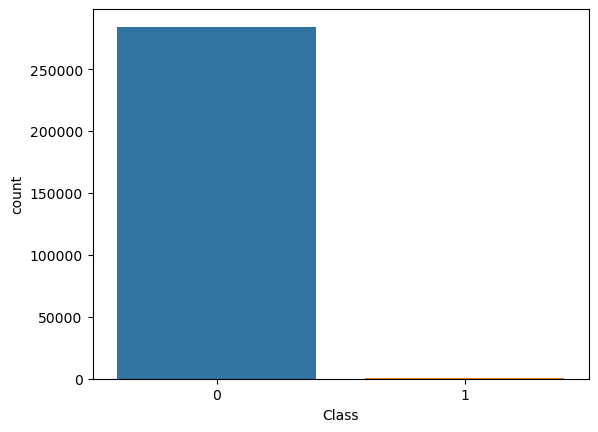

In [11]:
# Let's plot the classes

sns.countplot(x='Class', data=df)

### We will create a subsample that has balanced data

In [14]:
# We will create a subsample that has balanced data
df = df.sample(frac=1) 
#print("printing a few rows after shuffling:")
#print(df[0:5])

# creating a dataframe with all fraudulent data
fraud_data = df.loc[df["Class"]==1] # is a dataframe
print(fraud_data.shape)

# determining the shape of fraud dataframe and using the numbe rof rows information
n_samples = fraud_data.shape[0]

# creating a dataframe with all non-fraudulent data, same size as the fraud dataframe
non_fraud_data = df.loc[df["Class"]==0][:n_samples] # is a dataframe
print(non_fraud_data.shape)

# combining fraud and non-fraud dataframes
new_concat = pd.concat([fraud_data, non_fraud_data]) # concat will stack one over the other

print(new_concat)

# shuffle the rows in the dataframe so thatwe mix the non-fraud and fraud rows properly
new_df = new_concat.sample(frac=1, random_state=42)

new_df.head()

(492, 31)
(492, 31)
            Time        V1        V2         V3        V4        V5        V6  \
154720  102676.0 -5.552122  5.678134  -9.775528  8.416295 -4.409844 -1.506235   
93788    64585.0  1.080433  0.962831  -0.278065  2.743318  0.412364 -0.320778   
150663   93853.0 -5.839192  7.151532 -12.816760  7.031115 -9.651272 -2.938427   
120505   75851.0 -4.793667  3.418911  -5.074445  4.035987 -3.527875 -1.923242   
105178   69394.0  1.140431  1.134243  -1.429455  2.012226  0.622800 -1.152923   
...          ...       ...       ...        ...       ...       ...       ...   
92124    63788.0 -0.601404  0.377040   1.172343 -1.339888 -1.174583 -0.268416   
254153  156604.0  0.117608  0.725466  -1.684155 -1.550669  3.113450  3.220135   
168201  119111.0  2.005143  0.107798  -0.914687  0.556336 -0.327097 -1.762086   
171566  120700.0 -0.724433  0.963357   1.263609  1.389947  0.459574  0.028566   
139628   83261.0 -3.478139 -4.621922   2.689967 -0.118499  1.416116 -2.147125   

       

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
250962,155144.0,-0.786128,0.208423,0.332628,-0.495246,-1.399415,0.187361,1.513176,0.015040,0.649236,...,-0.050943,-0.057413,0.424855,-0.232354,-1.221914,-0.811065,-0.031155,-0.113643,325.00,0
27749,34687.0,-0.860827,3.131790,-5.052968,5.420941,-2.494141,-1.811287,-5.479117,1.189472,-3.908206,...,1.192694,0.090356,-0.341881,-0.215924,1.053032,0.271139,1.373300,0.691195,19.02,1
122333,76522.0,0.973487,-1.260284,1.210311,-0.666321,-1.474128,0.834116,-1.343899,0.405006,-0.569873,...,0.020354,0.369041,0.014829,-0.214658,-0.242417,1.142257,0.009061,0.032129,125.90,0
15204,26556.0,-19.179826,11.817922,-21.919174,6.086236,-14.708845,-4.308888,-15.357952,12.857165,-3.999861,...,1.746802,-1.353149,-0.762965,0.117028,1.297994,-0.224825,1.621052,0.484614,99.99,1
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1


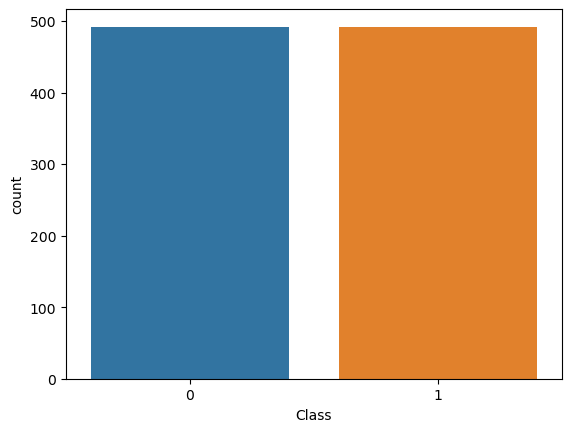

In [15]:
sns.countplot(x="Class", data=new_df)
plt.show()

C:\Users\localuser\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\localuser\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


++++++++
[0.0, 2125.87]
after sns


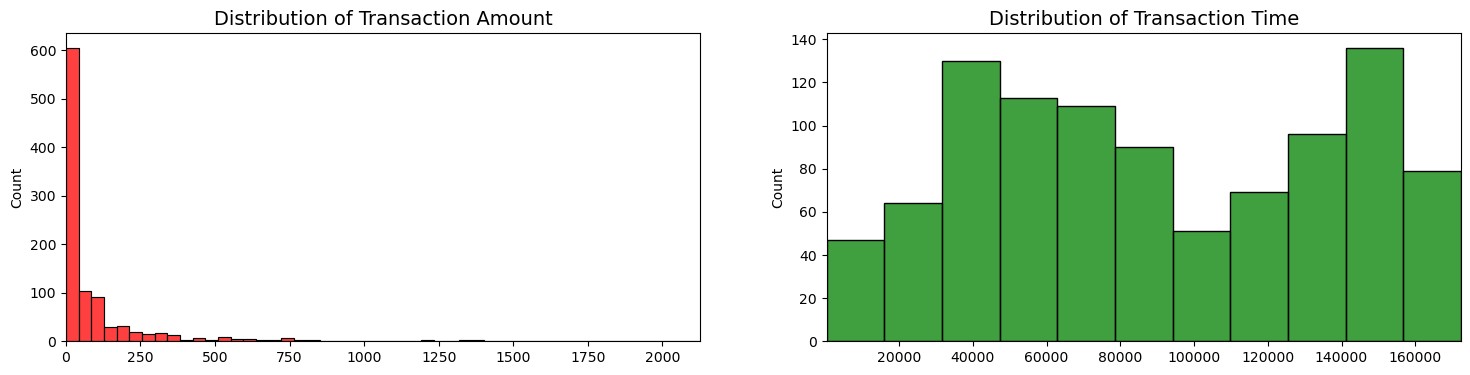

In [16]:
# Let's plot distribution of Amount and Time columns separately

fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = new_df['Amount'].values
time_val = new_df['Time'].values

sns.histplot(amount_val, ax=ax[0], color='r', bins=50)
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])
print("++++++++")
print([min(amount_val), max(amount_val)])

sns.histplot(time_val, ax=ax[1], color='g')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])
print("after sns")

In [17]:
# x will contain all columns except the target column which is "Class" and "Time"
x = new_df.drop(['Class', 'Time'], axis=1)
y = new_df['Class']

In [16]:
#print(x.shape)

print(new_df.shape)

(984, 31)


In [18]:
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
# we are creating an instance of StandardScaler class and then performing a fit on x_train to obtain 
# mean and standard deviation for x-train
# then use it to transorm both x_train and x_test

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x_train) # mean and standard deviation for x-train

train_sc = scaler.transform(x_train) 

test_sc = scaler.transform(x_test)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
model = LogisticRegression(penalty='l2', C=1, solver='lbfgs')

In [23]:
import numpy as np

print(y_train.shape)
y_train = np.array(y_train).flatten()
print(y_train.shape)

(787,)
(787,)


In [24]:
model.fit(train_sc, y_train)

LogisticRegression(C=1)

In [25]:
print(test_sc.shape)

(197, 29)


In [26]:
ypred = model.predict(test_sc)

In [27]:
# to get coefficients and intercepts use the following command
print(model.coef_, model.intercept_)

[[-0.42946724  0.26313593 -0.08669751  2.71554789  1.04678297 -0.45893657
   0.06651062 -1.38697488 -0.11819845 -1.44453979  1.3218101  -1.94221993
  -0.19040544 -2.38178573  0.07592734  0.08418159 -0.41184622  0.13493134
  -0.1130477  -0.74153108  0.06123425  0.66585737  0.01987392 -0.13839877
   0.1536115  -0.36865391 -0.05040904  0.54304574  0.74139874]] [3.58688087]


In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, ypred)

array([[86,  1],
       [13, 97]], dtype=int64)

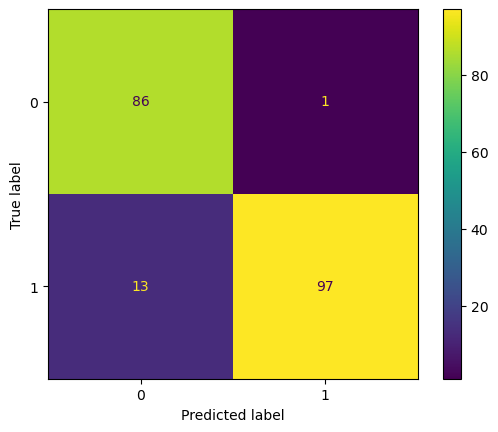

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, ypred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

plt.show()

In [31]:
from sklearn.metrics import accuracy_score
print("Base rate accuracy is: %0.2f" %(accuracy_score(y_test, ypred)))

Base rate accuracy is: 0.93


In [32]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [33]:
logit_roc_auc = roc_auc_score(y_test, ypred)
print("Logistic AUC = %0.2f" %logit_roc_auc)
print(classification_report(y_test, ypred))

Logistic AUC = 0.94
              precision    recall  f1-score   support

           0       0.87      0.99      0.92        87
           1       0.99      0.88      0.93       110

    accuracy                           0.93       197
   macro avg       0.93      0.94      0.93       197
weighted avg       0.94      0.93      0.93       197



In [34]:
from sklearn.metrics import roc_curve
print(test_sc.shape)
print(y_test[0:5])
b = model.predict_proba(test_sc)[:,1]
print(b[0:5])
fpr, tpr, threshold = roc_curve(y_test, b)
#print(fpr)
#print(tpr)
#print(threshold)

(197, 29)
11710     1
116404    1
201184    0
44556     1
15751     1
Name: Class, dtype: int64
[1.         0.99330975 0.02417338 0.99997873 0.99969607]


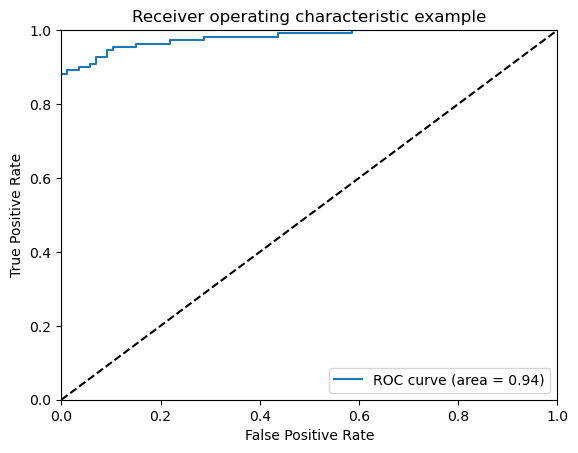

In [36]:
# plotting ROC curve
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' %logit_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In-class activity 1:

Summarize logistic regression steps.


In-class activity 2:

Randonmly select 14 columns out of v1 to v28 columns, then consider 14 columns and amount and build a logistic regression model.